In [11]:
#!pip install pandas plotly mlxtend ipywidgets ipykernel nbformat matplotlib seaborn

In [12]:
#EDA
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from mlxtend.frequent_patterns import apriori, association_rules

### Carregamento dos dados

In [ ]:
#Carregar os dados no DataFrame
df_transacoes = pd.read_csv('dataset.csv', sep=',')

In [14]:
#Visualizar estrutura
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   POS Txn  4539 non-null   uint64
 1   Dept     4539 non-null   object
 2   ID       4539 non-null   int64 
 3   Sales U  4539 non-null   int64 
dtypes: int64(2), object(1), uint64(1)
memory usage: 142.0+ KB


In [15]:
#Visualizar os 10 primeiros registros
df_transacoes.head(10)

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1
5,16120100160021008773,0983:WINE,177,4
6,16120100160021008773,0991:TOBACCO,179,2
7,16120100160021008774,0597:HEALTH AIDS,93,1
8,16120100160021008774,0604:PERSONAL CARE,100,5
9,16120100160021008775,0819:PRE-RECORDED A/V,135,1


In [16]:
#Visualizar os 10 ultimos registros
df_transacoes.tail(10)

,POS Txn,Dept,ID,Sales U
4529,16120100160162000841,0857:PC PERIPH/OFFICE ACC,155,1
4530,16120100160162000841,0931:BATH,165,1
4531,16120100160162000841,0941:BEDDING,167,1
4532,16120100160162000841,0991:TOBACCO,179,1
4533,16120100160162000842,0815:AUDIO ELECTRONICS,132,1
4534,16120100160162000843,0857:PC PERIPH/OFFICE ACC,155,1
4535,16120100160162000845,0395:MENS ATHLETIC SHOES,49,1
4536,16120100160162000845,0815:AUDIO ELECTRONICS,132,1
4537,16120100160162000846,0532:AMERICAN GREETINGS,72,1
4538,16120100160221001467,0066:VENDING/AMUSEMENT MA,242,1


### EDA

In [17]:
#Renomear as colunas para facilitar o entendimento
df_transacoes.rename(columns={'POS Txn': 'ID_Transacao', 'Dept': 'Departamento',
                              'ID': 'ID_Departamento', 'Sales U': 'Qtde_Vendida'}, inplace=True)

In [18]:
#Visualizar a estrutura
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Transacao     4539 non-null   uint64
 1   Departamento     4539 non-null   object
 2   ID_Departamento  4539 non-null   int64 
 3   Qtde_Vendida     4539 non-null   int64 
dtypes: int64(2), object(1), uint64(1)
memory usage: 142.0+ KB


In [19]:
#Quantidade de Departamentos
df_transacoes['Departamento'].nunique()

160

In [20]:
#Quantidade de ID Departamentos
df_transacoes['ID_Departamento'].nunique()

160

In [21]:
#Quantidade de Transações
df_transacoes['ID_Transacao'].nunique()

2064

In [22]:
#Verificação se um departamento pode aparecer mais de uma vez na mesma transação()
(len(df_transacoes.groupby(['ID_Transacao', 'Departamento'])) != len(df_transacoes))

False

In [23]:
#Checar se há quantidades negativas e iguais a zero (<= 0)
len(df_transacoes[df_transacoes['Qtde_Vendida'] <= 0])

149

In [24]:
#Remover as linhas com quantidades vendidas <= 0
df_transacoes = df_transacoes[df_transacoes['Qtde_Vendida'] > 0]

In [25]:
#Verificação de quais departamentos tem o maior volume de transações e maior quantidade de unidade vendidas
#Parte 1: Volume de Transações
#Quantidade de transações únicas onde cada departamento aparece
contagem_transacoes_por_departamento = df_transacoes.value_counts('Departamento')

#Plot
fig_volume_transacoes = px.bar(contagem_transacoes_por_departamento, color=contagem_transacoes_por_departamento.index, orientation='h')
fig_volume_transacoes.update_layout(showlegend=False)
fig_volume_transacoes.show()

In [26]:
#Verificação do top 10 de quais departamentos tem o maior volume de transações e maior quantidade de unidade vendidas
#Parte 1: Volume de Transações
#Quantidade de transações únicas onde cada departamento aparece
contagem_transacoes_por_departamento_top10 = df_transacoes.value_counts('Departamento').head(10)

#Plot
fig_volume_transacoes_top10 = px.bar(contagem_transacoes_por_departamento_top10, color=contagem_transacoes_por_departamento_top10.index, orientation='h')
fig_volume_transacoes_top10.update_layout(showlegend=False)
fig_volume_transacoes_top10.show()

In [27]:
#Verificação de quais departamentos tem o maior volume de transações e maior quantidade de unidade vendidas
#Parte 2: Quantidade de Unidades Vendidas
#Soma de Unidades Vendidas das Transações onde cada departamento aparece
soma_quantidades_por_departamento = df_transacoes.groupby('Departamento')['Qtde_Vendida'].sum().sort_values(ascending=False)

#Plot
fig_unidades_vendidas = px.bar(soma_quantidades_por_departamento, color=soma_quantidades_por_departamento.index, orientation='h')
fig_unidades_vendidas.update_layout(showlegend=False)
fig_unidades_vendidas.show()

In [28]:
#Verificação do top 10 de quais departamentos tem o maior volume de transações e maior quantidade de unidade vendidas
#Parte 2: Quantidade de Unidades Vendidas
#Soma de Unidades Vendidas das Transações onde cada departamento aparece
soma_quantidades_por_departamento_top10 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].sum().sort_values(ascending=False).head(10)

#Plot
fig_unidades_vendidas_top10 = px.bar(soma_quantidades_por_departamento_top10, color=soma_quantidades_por_departamento_top10.index, orientation='h')
fig_unidades_vendidas_top10.update_layout(showlegend=False)
fig_unidades_vendidas_top10.show()

In [29]:
#Unificar dois gráficos top10, para mostrar lado a lado

#Criar subplots
fig_pergunta_1 = make_subplots(rows=1, cols=2, subplot_titles=('Volume de Transações', 'Unidades Vendidas'))

#Adicionar os gráficos aos subplots
for trace in fig_volume_transacoes_top10['data']:
  fig_pergunta_1.add_trace(trace, row=1, col=1)

for trace in fig_unidades_vendidas_top10['data']:
  fig_pergunta_1.add_trace(trace, row=1, col=2)

#Atualizar layout
fig_pergunta_1.update_layout(height=800, width=1000, title_text='Top10 Departamentos', showlegend=False)

#Mostrar o gráfico
fig_pergunta_1.show()

In [30]:
#Verificação de quais departamentos tem a maior variação nas unidades vendidas por transação (Top20)
#Calcular o desvio padrão das quantidades vendidas, agrupando por departamento
desvio_padrao_quantidades_por_departamento_top20 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].std().sort_values(ascending=False).head(20)

#Plot
fig_variacao_unidades_vendidas_top20 = px.bar(desvio_padrao_quantidades_por_departamento_top20, color=desvio_padrao_quantidades_por_departamento_top20.index, orientation='h')
fig_variacao_unidades_vendidas_top20.update_layout(showlegend=False)
fig_variacao_unidades_vendidas_top20.show()


In [31]:
#Verificação de qual é a distribuição de unidades vendidas por departamento nas diferente transações
#Avaliar as medidas de posições da variável Qtde Vendida
px.box(df_transacoes, x='Departamento', y='Qtde_Vendida')

In [32]:
#Verificação de quais departamentos tem a maior média nas unidades vendidas por transação (Top20)
#Calcular a média das quantidades vendidas, agrupando por departamento
media_quantidades_por_departamento_top20 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].mean().sort_values(ascending=False).head(20)

#Plot
fig_media_unidades_vendidas_top20 = px.bar(media_quantidades_por_departamento_top20, color=media_quantidades_por_departamento_top20.index, orientation='h')
fig_media_unidades_vendidas_top20.update_layout(showlegend=False)
fig_media_unidades_vendidas_top20.show()

In [33]:
#Unificar dois gráficos top10, para mostrar lado a lado

#Criar subplots
fig_pergunta_4 = make_subplots(rows=1, cols=2, subplot_titles=('Desvio Padrão', 'Média'))

#Adicionar os gráficos aos subplots
for trace in fig_variacao_unidades_vendidas_top20['data']:
  fig_pergunta_4.add_trace(trace, row=1, col=1)

for trace in fig_media_unidades_vendidas_top20['data']:
  fig_pergunta_4.add_trace(trace, row=1, col=2)

#Atualizar layout
fig_pergunta_4.update_layout(height=800, width=1000, title_text='Top20 Departamentos - Unidades Vendidas', showlegend=False)

#Mostrar o gráfico
fig_pergunta_4.show()

### Preparação da Base com Pivot Table

In [34]:
|ID_Trans|Prod1|Prod2|Prod3|Prod4|
|00000001|X    |     |X    |     |
|00000002|X    |X    |X    |     |
|00000003|     |     |X    |X    |

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-34-3bd3a9007803>, line 2)

In [35]:
#Criar uma Pivot Table no pandas com ID_Transacao como linha e Departamento como coluna, soma de quantidade vendida como valor
df_transacoes_pivot = df_transacoes.pivot_table(index='ID_Transacao',
                                                columns='Departamento',
                                                values='Qtde_Vendida',
                                                aggfunc='sum')

In [36]:
df_transacoes_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1943 entries, 16120100160021008773 to 16120100160221001467
Columns: 156 entries, 0002:BARBER RETAIL to 0999:UNSCANNED ITEMS
dtypes: float64(156)
memory usage: 2.3 MB


In [37]:
#Verificação dos primeiros registros
df_transacoes_pivot.head(20)

Departamento,0002:BARBER RETAIL,0009:FLORAL SERV/SUPPLIES,0012:LOCAL GIFTS/FOODS,0014:REPAIRS,0016:FINANCIAL SERVICES,0018:OTHER DIRECT SERVICE,0033:VENDING RETAIL,0056:SOUVENIR,0066:VENDING/AMUSEMENT MA,0071:BEAUTY RETAIL,...,0941:BEDDING,0961:GENERAL GROCERIES,0962:BEVERAGES,0965:PERISHABLES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO,0999:UNSCANNED ITEMS
ID_Transacao,,,,,,,,,,,,,,,,,,,,,
16120100160021008773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,4.0,NaN,2.0,NaN
16120100160021008774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120100160021008775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
16120100160021008776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120100160021008777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
16120100160021008778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN
16120100160021008779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN
16120100160021008780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120100160021008781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN,NaN


In [38]:
#Converter os dados da Pivot Table para boolean
df_transacoes_pivot = df_transacoes_pivot.map(lambda x: True if x > 0 else False)

In [39]:
#Remover o título Departamento
df_transacoes_pivot = df_transacoes_pivot.rename_axis(None, axis=1)

In [40]:
#Remover a coluna ID_Transacao (Index)
df_transacoes_pivot.reset_index(inplace=True)

In [41]:
#Remover coluna ID Transacao
df_transacoes_pivot.drop(columns=['ID_Transacao'], axis=1, inplace=True)

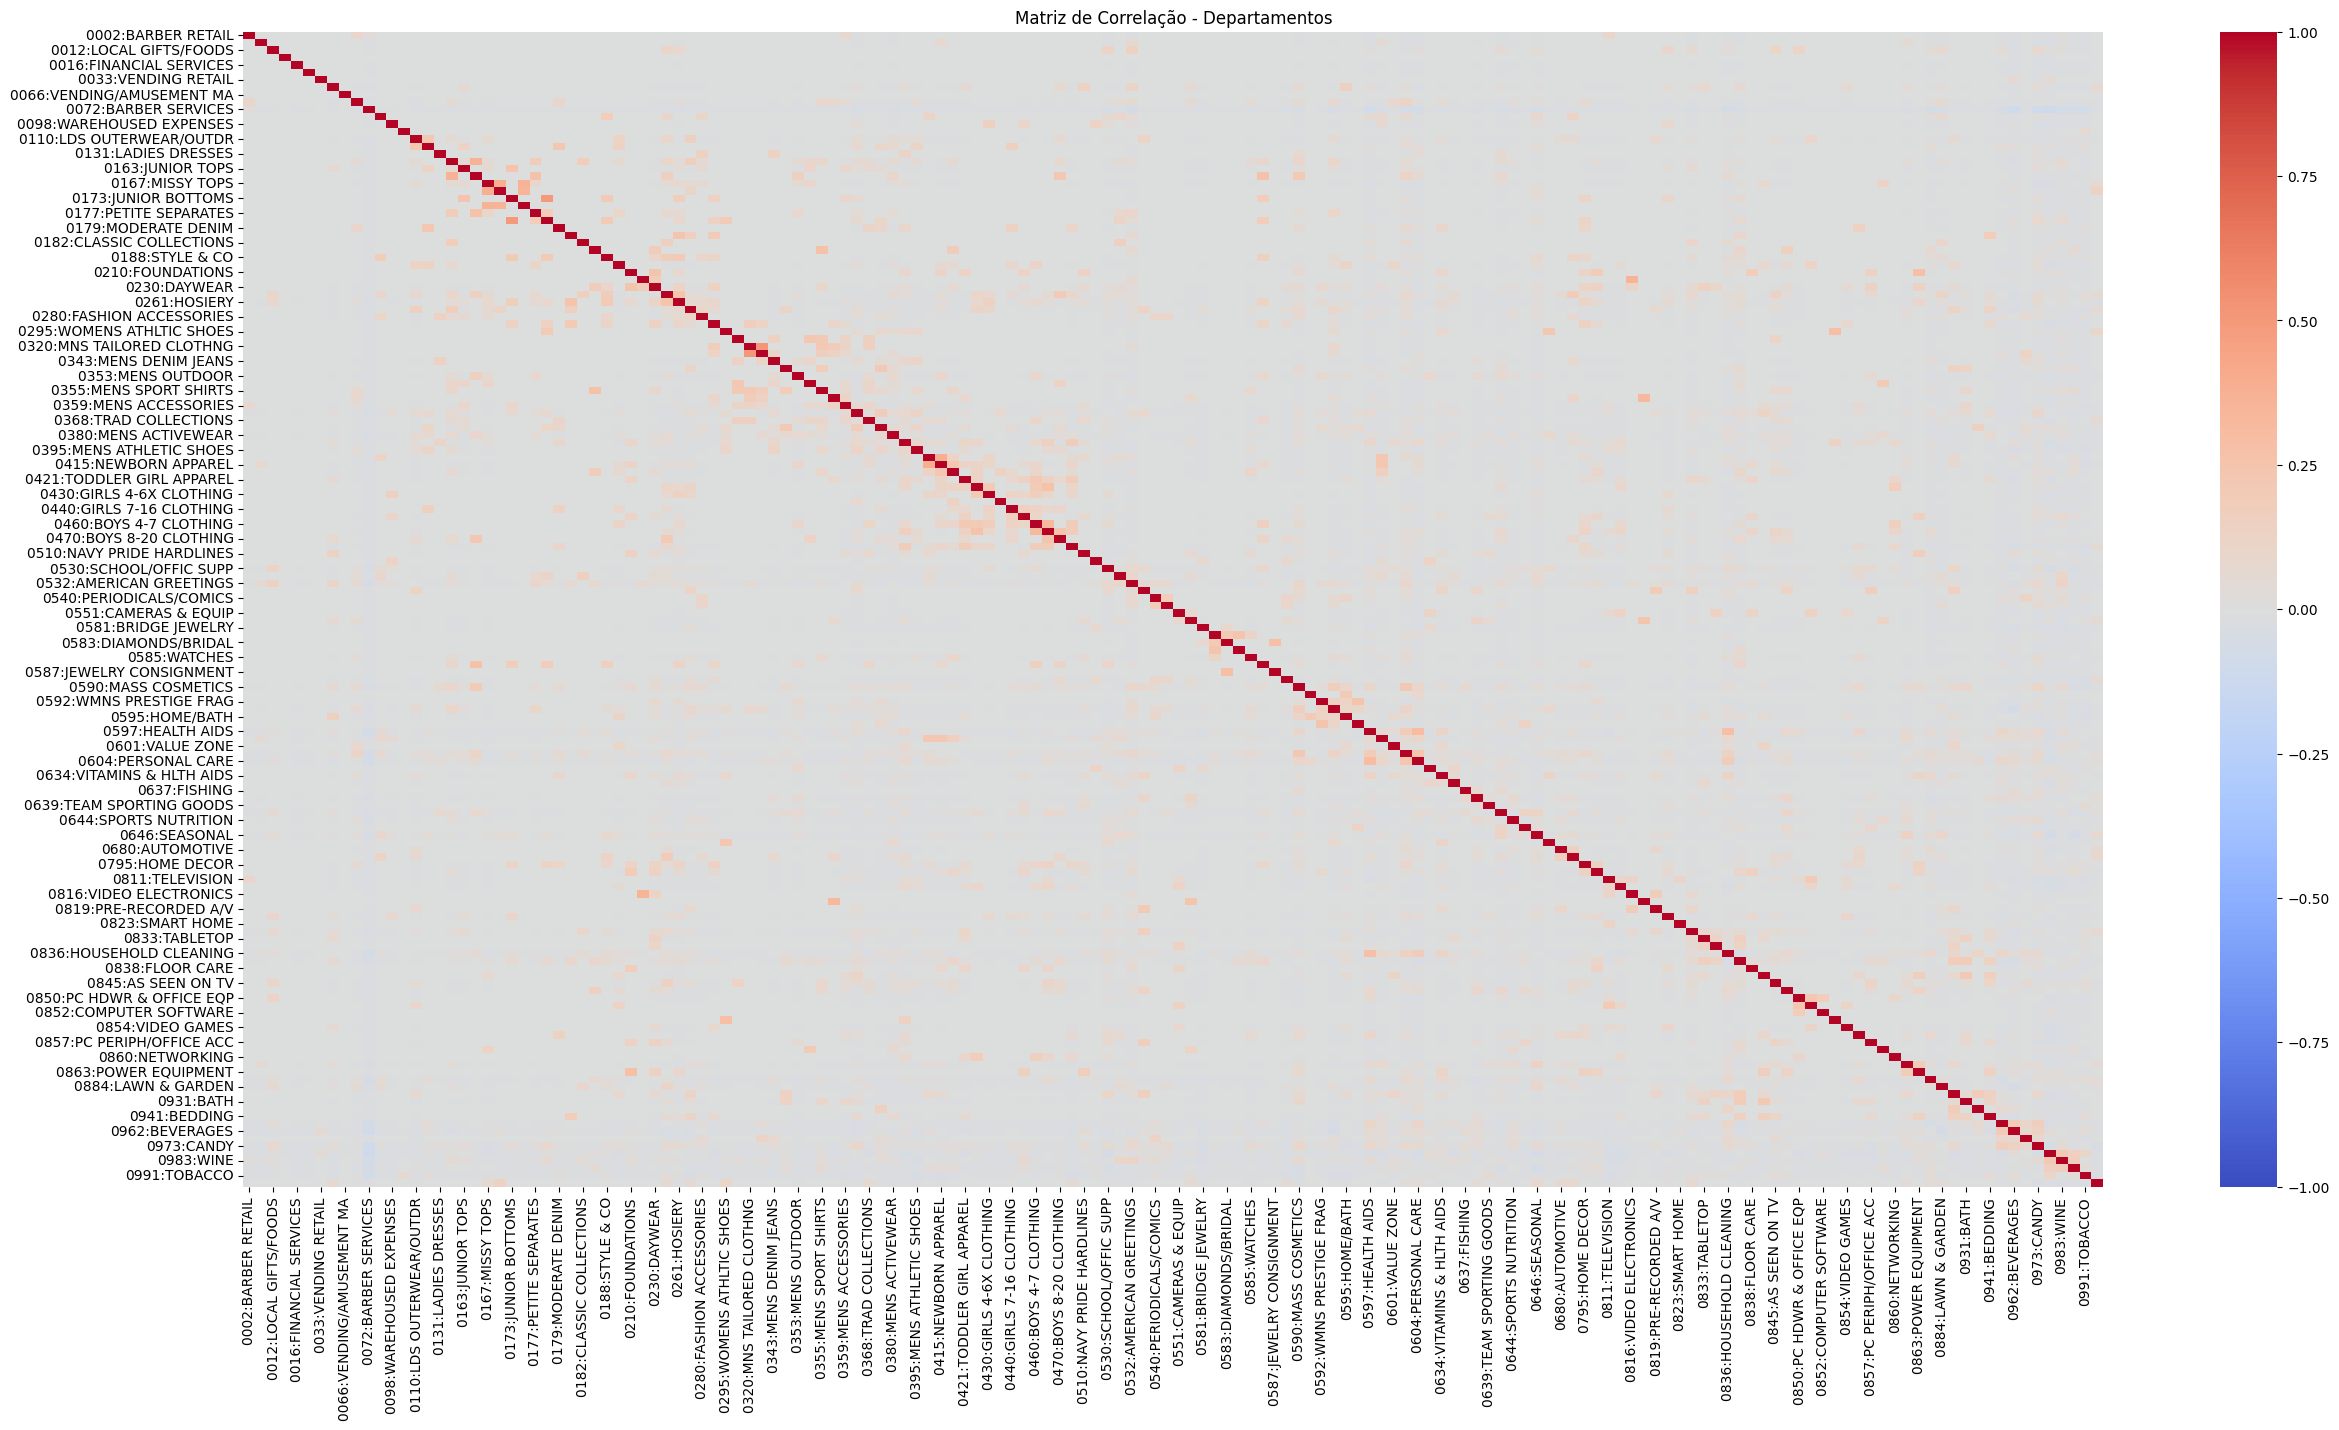

In [42]:
#Verificação de qual é a correlação entre os departamentos
associacao_departamentos = df_transacoes_pivot.corr()
plt.figure(figsize=(30,15))
sns.heatmap(associacao_departamentos, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Departamentos')
plt.show()

### Realizar Market Basket Analysis com Apriori

In [43]:
#Obter uma lista de itemsets frequentes
#Suporte que seja em 2% a 5%
#Cobertura adequada = 40 a 100 transações
#Diversidade de Departamentos, sem ser muito restritivo

itemsets_frequentes = apriori(df_transacoes_pivot, min_support=0.02, use_colnames=True, verbose=1)

Processing 165 combinations | Sampling itemset size 3


In [44]:
#Verificação de quantos itemsets foram selecionados
len(itemsets_frequentes)

36

In [45]:
#Criar uma coluna para armazenar o tamanho do itemset
itemsets_frequentes['tamanho'] = itemsets_frequentes['itemsets'].apply(lambda x: len(x))

In [46]:
#Verificação de quais são os itemsets
itemsets_frequentes

,support,itemsets,tamanho
0,0.057643,(0072:BARBER SERVICES),1
1,0.024704,(0360:MENS FURNISHINGS),1
2,0.024189,(0380:MENS ACTIVEWEAR),1
3,0.027277,(0530:SCHOOL/OFFIC SUPP),1
4,0.053011,(0532:AMERICAN GREETINGS),1
5,0.026248,(0590:MASS COSMETICS),1
6,0.022645,(0593:PRESTIGE COSMETICS),1
7,0.102934,(0597:HEALTH AIDS),1
8,0.067936,(0603:BEAUTY CARE),1
9,0.077200,(0604:PERSONAL CARE),1


In [47]:
#Filtrar itemsets com 2 departamentos
itemsets_frequentes[itemsets_frequentes.tamanho == 2]

,support,itemsets,tamanho
24,0.021616,"(0603:BEAUTY CARE, 0597:HEALTH AIDS)",2
25,0.032939,"(0597:HEALTH AIDS, 0604:PERSONAL CARE)",2
26,0.031395,"(0597:HEALTH AIDS, 0836:HOUSEHOLD CLEANING)",2
27,0.023160,"(0597:HEALTH AIDS, 0973:CANDY)",2
28,0.021101,"(0603:BEAUTY CARE, 0604:PERSONAL CARE)",2
29,0.022131,"(0962:BEVERAGES, 0961:GENERAL GROCERIES)",2
30,0.020072,"(0973:CANDY, 0961:GENERAL GROCERIES)",2
31,0.034483,"(0962:BEVERAGES, 0973:CANDY)",2
32,0.025219,"(0962:BEVERAGES, 0982:SPIRITS)",2
33,0.039629,"(0983:WINE, 0982:SPIRITS)",2


In [48]:
#Validação da informação de suporte EX: 0982:SPIRITS
#Suporte = transações onde o itemset aparece / total de transações

transacoes_spirits = len(df_transacoes_pivot[df_transacoes_pivot['0982:SPIRITS'] == True])
total_transacoes = len(df_transacoes_pivot)
suporte_spirits = transacoes_spirits / total_transacoes
print(f'Suporte 0982:SPIRITS {suporte_spirits}')


Suporte 0982:SPIRITS 0.16160576428203807


In [49]:
#Criar Regras de Associação com base nos itemsets frequentes
#Usando Confiança = 40%
regras_associacao = association_rules(itemsets_frequentes, metric='confidence', min_threshold=0.4)
regras_associacao

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(0604:PERSONAL CARE),(0597:HEALTH AIDS),0.077200,0.102934,0.032939,0.426667,4.145067,1.0,0.024992,1.564651,0.822225,0.223776,0.360880,0.373333
1,(0961:GENERAL GROCERIES),(0962:BEVERAGES),0.050952,0.130211,0.022131,0.434343,3.335689,1.0,0.015496,1.537663,0.737805,0.139159,0.349662,0.302152
2,(0983:WINE),(0982:SPIRITS),0.098302,0.161606,0.039629,0.403141,2.494598,1.0,0.023743,1.404678,0.664450,0.179907,0.288093,0.324182
